In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras import models, layers, backend
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from skimage.metrics import structural_similarity

In [2]:
imsize = (100,100)

thresh = 50

In [3]:
##
## Importing the "Yes" pictures
##
## The loop will find the middle array of pixels for the length and width
## and then find the min and max index that meets a threshold. It then
## crops the image to remove a majority of the black space in the images.
##

Yes = []

for i in os.listdir('Brain_Tumor_Detection/yes/'):
    file = 'Brain_Tumor_Detection/yes/' + i
    img = np.array(Image.open(file).convert('L'))
    s1,s2 = img.shape
    hmin = np.min(np.argwhere(img[s1//2,:] > thresh))
    hmax = np.max(np.argwhere(img[s1//2,:] > thresh))
    vmin = np.min(np.argwhere(img[:,s2//2-5] > thresh))
    vmax = np.max(np.argwhere(img[:,s2//2-5] > thresh))
    img = img[vmin:vmax,hmin:hmax]
    img = Image.fromarray(img).resize(imsize)
    img = np.array(img)
    Yes.append(img)

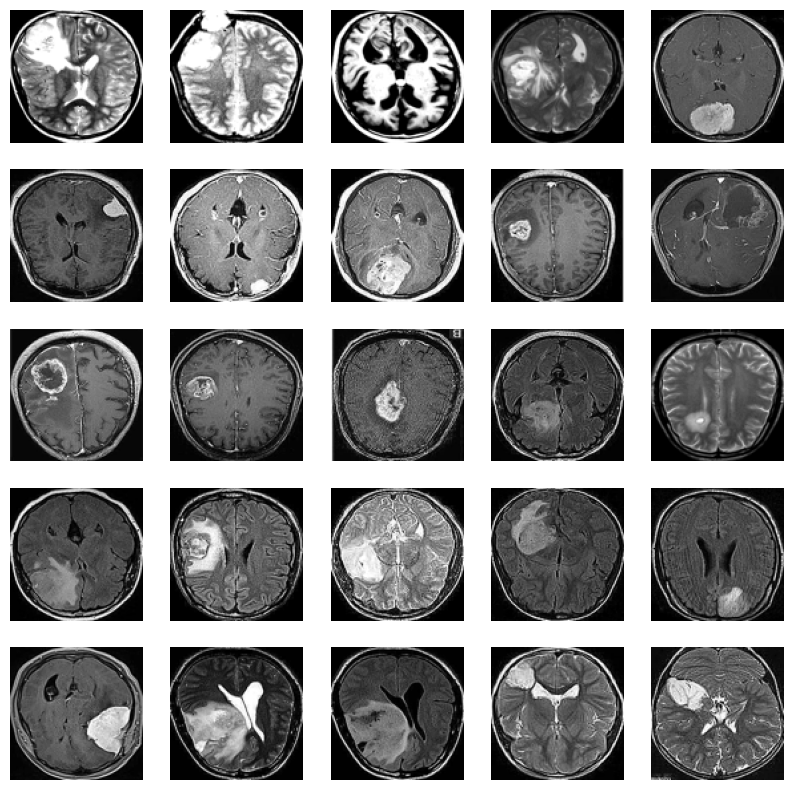

In [4]:
fig, ax = plt.subplots(5,5, figsize=(10,10))
for r in range(5):
    for c in range(5):
        ax[r,c].imshow(Yes[r*5+c], cmap='gray')
        ax[r,c].axis('off')
plt.show()

In [5]:
##
## Importing the "No" pictures
##
## The loop will find the middle array of pixels for the length and width
## and then find the min and max index that meets a threshold. It then
## crops the image to remove a majority of the black space in the images.
##

No = []

for i in os.listdir('Brain_Tumor_Detection/no/'):
    file = 'Brain_Tumor_Detection/no/' + i
    img = np.array(Image.open(file).convert('L'))
    s1,s2 = img.shape
    hmin = np.min(np.argwhere(img[s1//2,:] > thresh))
    hmax = np.max(np.argwhere(img[s1//2,:] > thresh))
    vmin = np.min(np.argwhere(img[:,s2//2-5] > thresh))
    vmax = np.max(np.argwhere(img[:,s2//2-5] > thresh))
    img = img[vmin:vmax,hmin:hmax]
    img = Image.fromarray(img).resize((imsize))
    img = np.array(img)
    No.append(img)

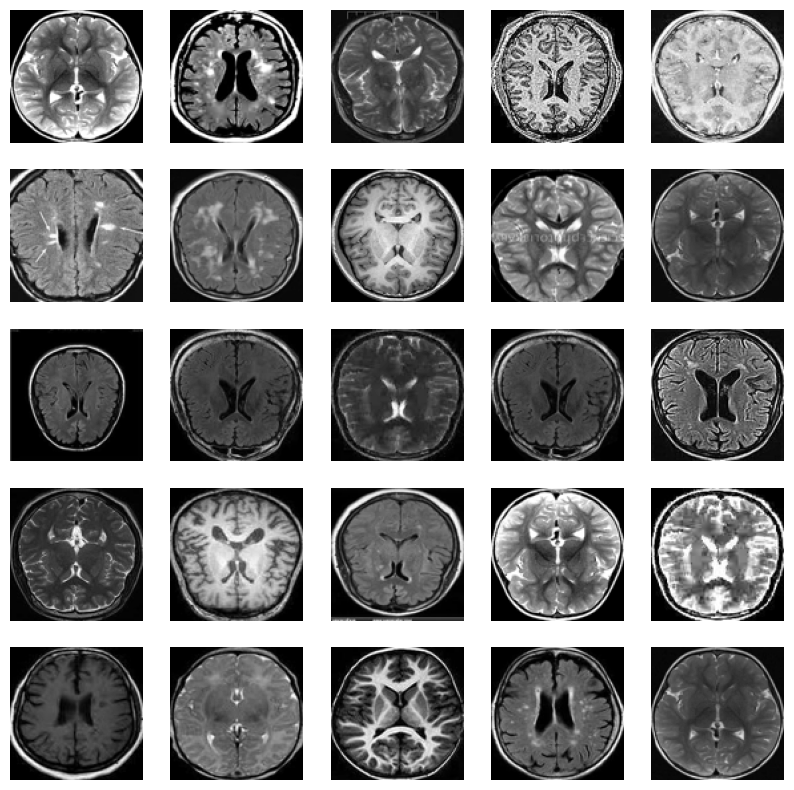

In [6]:
fig, ax = plt.subplots(5,5, figsize=(10,10))
for r in range(5):
    for c in range(5):
        ax[r,c].imshow(No[r*5+c], cmap='gray')
        ax[r,c].axis('off')
plt.show()

In [7]:
## Creating a combined X data set

No = np.array(No)
Yes = np.array(Yes)

xdata = np.concatenate([No, Yes], axis=0)
xdata.shape

(2966, 100, 100)

In [8]:
## One-hot encoding and combining the Y label data set

yNo = np.ones(No.shape[0])
yYes = np.zeros(Yes.shape[0])

ydata = np.concatenate([yNo, yYes])
ydata = ydata.reshape(ydata.shape[0],1)
ydata = np.concatenate([ydata, -ydata+1], axis=1)
ydata.shape

(2966, 2)

In [10]:
## Splitting the data into training and testing sets

xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.20, random_state=42)

In [78]:
## Creating a Convolutional Neural Network

backend.clear_session()

cnn = models.Sequential()
cnn.add(layers.Conv2D(filters=50, kernel_size=10, strides=3, activation='relu', input_shape=(imsize[0],imsize[1],1)))
cnn.add(layers.MaxPooling2D(2))
cnn.add(layers.Conv2D(filters=100, kernel_size=5, strides=1, activation='relu'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(2, activation='softmax'))
cnn.compile(optimizer='adam', metrics='accuracy', loss='CategoricalCrossentropy')
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 50)        5050      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 100)       125100    
                                                                 
 flatten (Flatten)           (None, 12100)             0         
                                                                 
 dense (Dense)               (None, 2)                 24202     
                                                                 
Total params: 154,352
Trainable params: 154,352
Non-trainable params: 0
__________________________________________________

In [79]:
## Training the model on the training data

cnn.fit(xtrain.reshape(xtrain.shape[0], xtrain.shape[1], xtrain.shape[2], 1), ytrain,
        validation_data=(xtest.reshape(xtest.shape[0], xtest.shape[1], xtest.shape[2], 1), ytest),
        epochs = 15)

Epoch 1/15
75/75 [==============================] - 4s 49ms/step - loss: 2.4619 - accuracy: 0.7188 - val_loss: 0.3219 - val_accuracy: 0.8721
Epoch 2/15
75/75 [==============================] - 3s 46ms/step - loss: 0.2559 - accuracy: 0.8959 - val_loss: 0.2415 - val_accuracy: 0.9125
Epoch 3/15
75/75 [==============================] - 4s 52ms/step - loss: 0.2212 - accuracy: 0.9115 - val_loss: 0.7622 - val_accuracy: 0.7172
Epoch 4/15
75/75 [==============================] - 4s 52ms/step - loss: 0.1336 - accuracy: 0.9477 - val_loss: 0.1920 - val_accuracy: 0.9377
Epoch 5/15
75/75 [==============================] - 4s 53ms/step - loss: 0.0641 - accuracy: 0.9789 - val_loss: 0.1747 - val_accuracy: 0.9562
Epoch 6/15
75/75 [==============================] - 4s 54ms/step - loss: 0.0175 - accuracy: 0.9958 - val_loss: 0.1423 - val_accuracy: 0.9596
Epoch 7/15
75/75 [==============================] - 4s 57ms/step - loss: 0.0058 - accuracy: 0.9996 - val_loss: 0.1401 - val_accuracy: 0.9680
Epoch 8/15
75

In [80]:
## Predicting the labels for the training and testing data

train_pred = cnn.predict(xtrain.reshape(xtrain.shape[0], xtrain.shape[1], xtrain.shape[2], 1))
test_pred = cnn.predict(xtest.reshape(xtest.shape[0], xtest.shape[1], xtest.shape[2], 1))

train_pred_labels = np.argmax(train_pred, axis=1)
test_pred_labels = np.argmax(test_pred, axis=1)

19/19 [==============================] - 0s 17ms/step


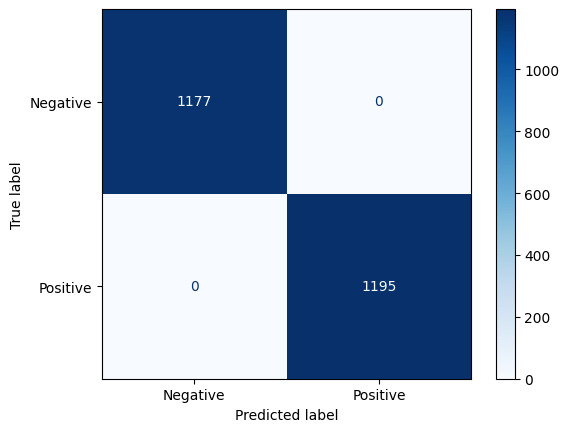

In [81]:
## Confusion matrix for the training data

ConfusionMatrixDisplay(confusion_matrix(ytrain[:,1], train_pred_labels), display_labels=['Negative', 'Positive']).plot(cmap='Blues')
plt.show()

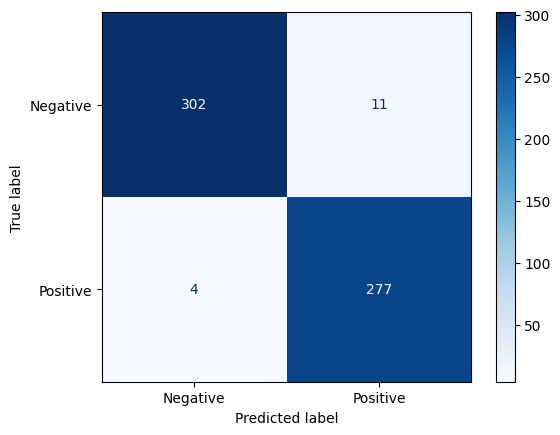

In [82]:
##
## Confusion matrix for the testing data
##
## In medical imaging, false negatives are more costly than false positives, so a lower FN rate is beneficial
##

ConfusionMatrixDisplay(confusion_matrix(ytest[:,1], test_pred_labels), display_labels=['Negative', 'Positive']).plot(cmap='Blues')
plt.show()

c:\Users\H487136\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


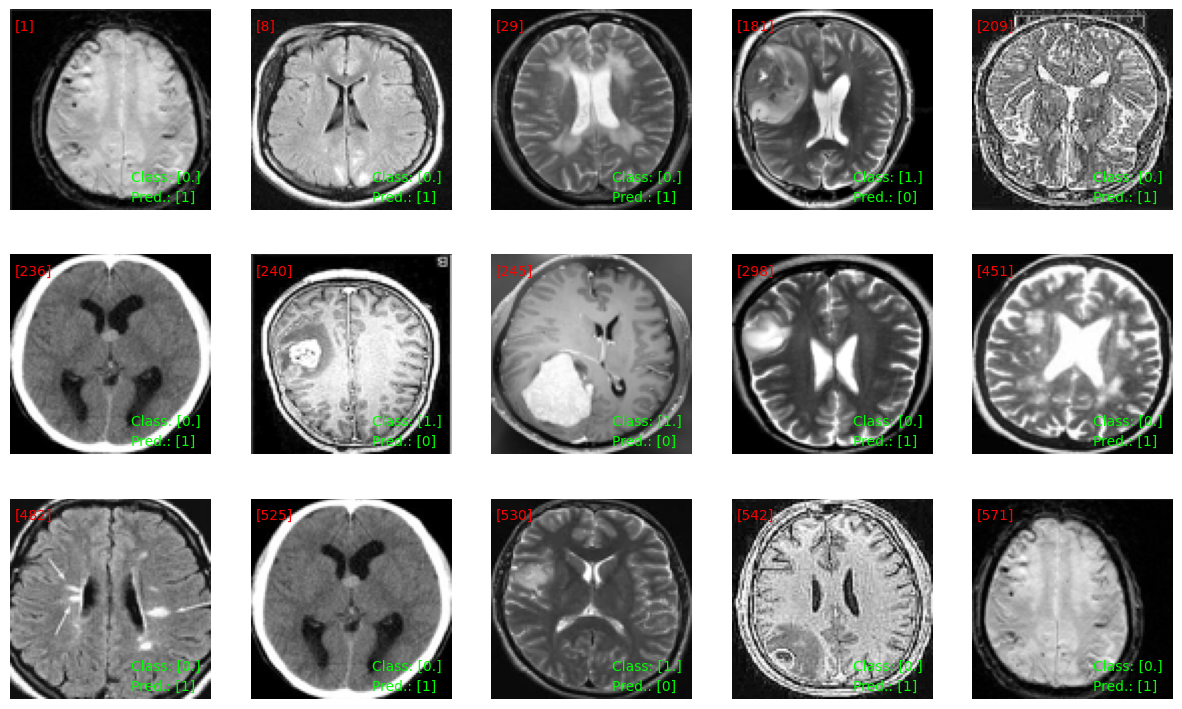

In [102]:
## Visualizing the misclassified testing data

misclass = np.argwhere(test_pred_labels != ytest[:,1])

fig, ax = plt.subplots(3,5, figsize=(15,9))

for r in range(3):
    for c in range(5):
        i = r*5+c
        
        ax[r,c].imshow(xtest[misclass[i]].reshape(100,100), cmap='gray')
        ax[r,c].text(x=2, y=10, s=misclass[i], color='red')
        ax[r,c].text(x=60, y=85, s='Class: {}'.format(ytest[misclass[i],1]), color=(0,1,0))
        ax[r,c].text(x=60, y=95, s='Pred.: {}'.format(test_pred_labels[misclass[i]]), color=(0,1,0))
        ax[r,c].axis('off')

plt.show()

In [103]:
## Importing the prediction data from the dataset

pred = []

for i in os.listdir('Brain_Tumor_Detection/pred/'):
    file = 'Brain_Tumor_Detection/pred/' + i
    img = np.array(Image.open(file).convert('L'))
    s1,s2 = img.shape
    hmin = np.min(np.argwhere(img[s1//2,:] > 50))
    hmax = np.max(np.argwhere(img[s1//2,:] > 50))
    vmin = np.min(np.argwhere(img[:,s2//2] > 50))
    vmax = np.max(np.argwhere(img[:,s2//2] > 50))
    img = img[vmin:vmax,hmin:hmax]
    img = Image.fromarray(img).resize(imsize)
    img = np.array(img)
    pred.append(img)

pred = np.array(pred)

In [104]:
## Predicing the labels for the new data

cnn_pred = cnn.predict(pred.reshape(pred.shape[0],imsize[0],imsize[1],1))

2/2 [==============================] - 0s 12ms/step


In [105]:
pred_labels = np.argmax(cnn_pred, axis=1)
pred_labels

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

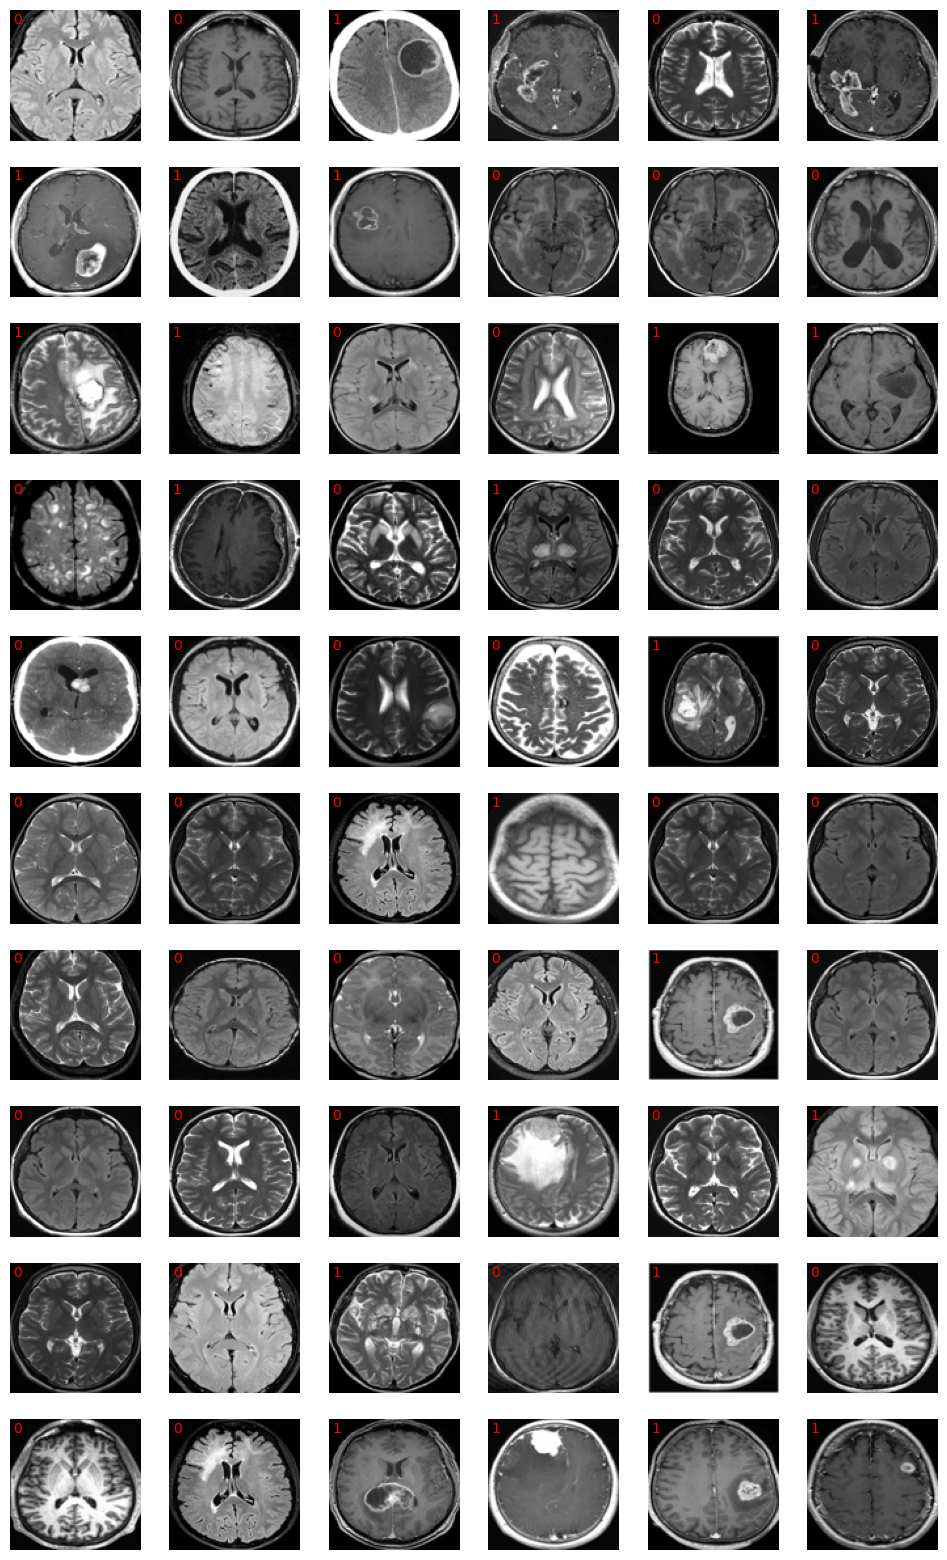

In [106]:
##
## Visualizing the prediction images with their predicted labels
##
## The CNN does a good job in detecting obvious tumors in the brain scans, but gives some apparent false positives as well.
##

fig, ax = plt.subplots(10,6, figsize=(12,20))
for r in range(10):
    for c in range(6):
        i = r*6+c
        ax[r,c].imshow(pred[i], cmap='gray')
        ax[r,c].text(x=2,y=10, s=pred_labels[i], color='red')
        ax[r,c].axis('off')
plt.show()

In [108]:
##
## We will now compare this method to a much more simple, though computationally heavy, structural similarity index.
##

ssim = [[structural_similarity(xtest[s], xtrain[r]) for r in range(len(xtrain))] for s in range(len(xtest))]

In [113]:
##
## Converting the SSIMs to labels by assigning the label of the closest match to the test data
##

ssim = np.array(ssim)
best_match = np.argmax(ssim, axis=1)
best_label = ytrain[best_match,1]


##
## Calculating the testing error
##

np.mean(best_label == ytest[:,1])

0.9814814814814815

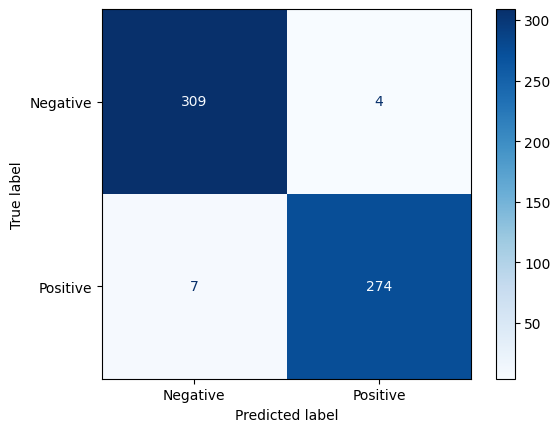

In [115]:
##
## Plotting the confusion matrix for the testing data
##

ConfusionMatrixDisplay(confusion_matrix(ytest[:,1], best_label), display_labels=['Negative', 'Positive']).plot(cmap='Blues')
plt.show()

c:\Users\H487136\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


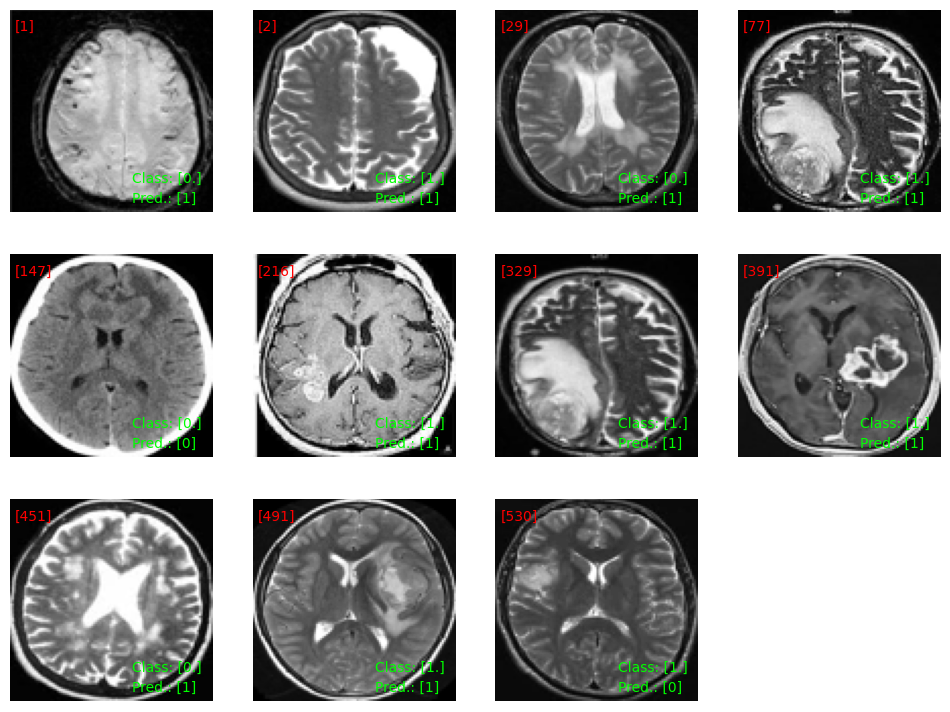

In [116]:
## Visualizing the misclassified testing data

misclass = np.argwhere(best_label != ytest[:,1])

fig, ax = plt.subplots(3,4, figsize=(12,9))

for r in range(3):
    for c in range(4):
        i = r*4+c

        if i == 11:
            ax[r,c].axis('off')
            break
        
        ax[r,c].imshow(xtest[misclass[i]].reshape(100,100), cmap='gray')
        ax[r,c].text(x=2, y=10, s=misclass[i], color='red')
        ax[r,c].text(x=60, y=85, s='Class: {}'.format(ytest[misclass[i],1]), color=(0,1,0))
        ax[r,c].text(x=60, y=95, s='Pred.: {}'.format(test_pred_labels[misclass[i]]), color=(0,1,0))
        ax[r,c].axis('off')

plt.show()

In [119]:
##
## Computing the labels of the prediction dataset
##

p_ssim = [[structural_similarity(pred[p], xtrain[r]) for r in range(len(xtrain))] for p in range(len(pred))]

p_ssim = np.array(p_ssim)
p_match = np.argmax(p_ssim, axis=1)
p_label = ytrain[p_match,1]

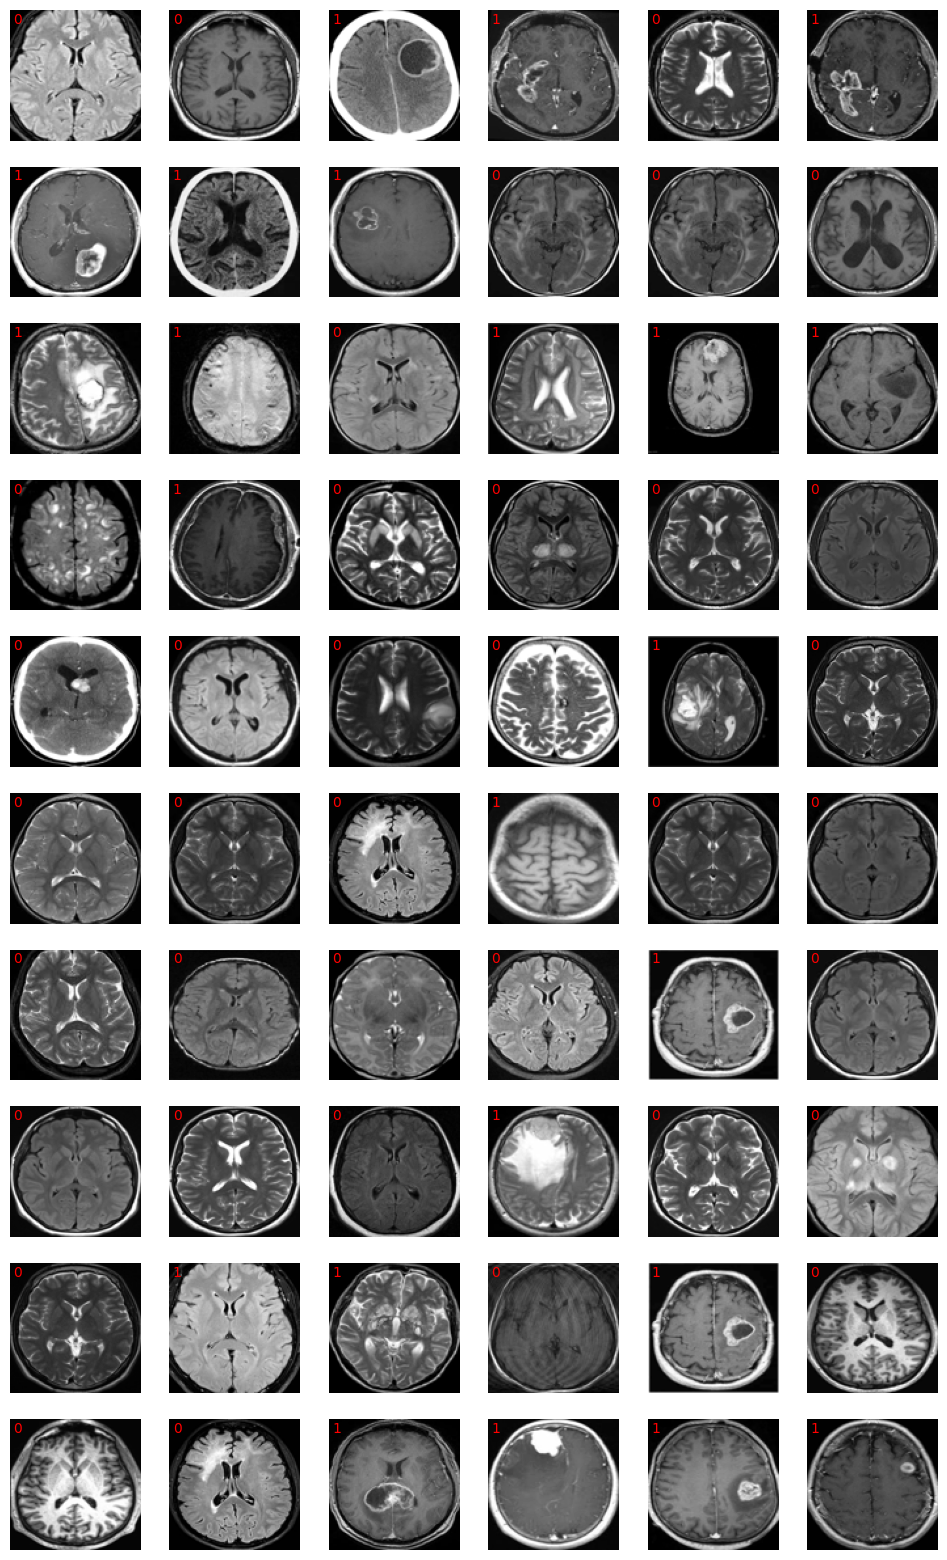

In [121]:
##
## Visualizing the prediction data with their SSIM labels
##
## SSIM does a good job of detecting obvious tumors but also has a number of apparent false positives
##
## However, this method is much less complex than a CNN though more computationally expensive
##

fig, ax = plt.subplots(10,6, figsize=(12,20))
for r in range(10):
    for c in range(6):
        i = r*6+c
        ax[r,c].imshow(pred[i], cmap='gray')
        ax[r,c].text(x=2,y=10, s=p_label[i].astype(int), color='red')
        ax[r,c].axis('off')
plt.show()